# Importing Libraries

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data

In [296]:
data = pd.read_csv('train.csv')

In [297]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Type of features:** 
- Categorical paramters: Sex, data.head()
- Discrete: SibSp, Parch, Pclass
- Continuous: Age, Fare

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [299]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [300]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical value Analysis

<AxesSubplot:>

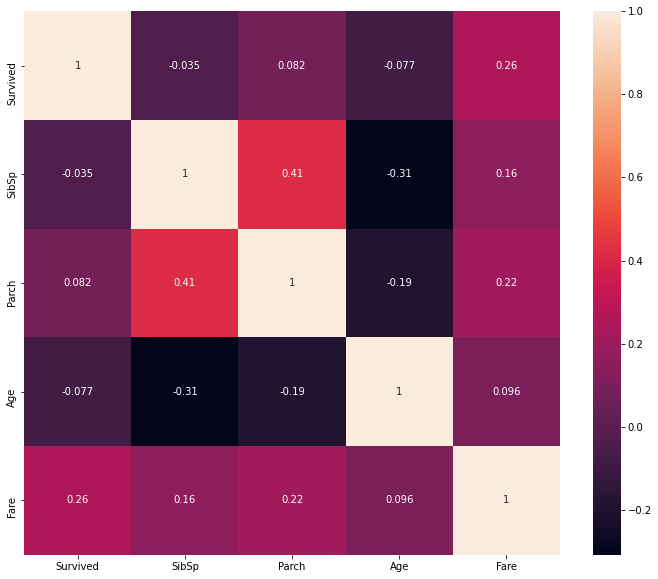

In [301]:
plt.figure(figsize  = (12, 10))
sns.heatmap(data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)

## <font color = "green">sibsp - Number of siblings / spouses aboard the Titanic </font>

In [302]:
data['SibSp'].nunique()

7

In [303]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


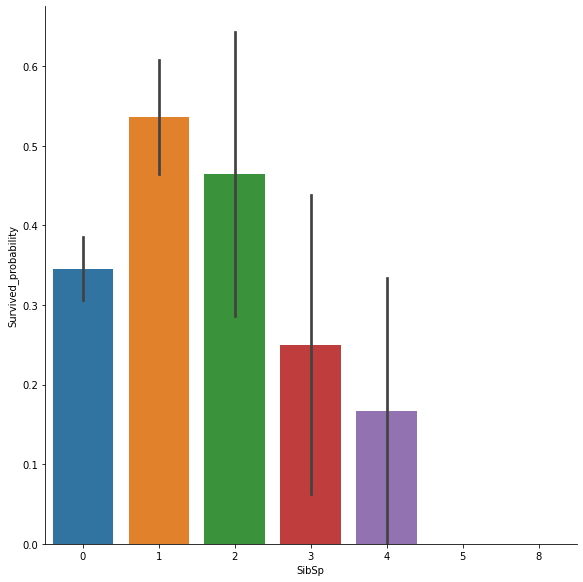

In [304]:
sibsp_graph = sns.factorplot(x = "SibSp", y = "Survived", data = data, kind = "bar", size = 8)
sibsp_graph = sibsp_graph.set_ylabels("Survived_probability")

## <font color = "green">Age</font>

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


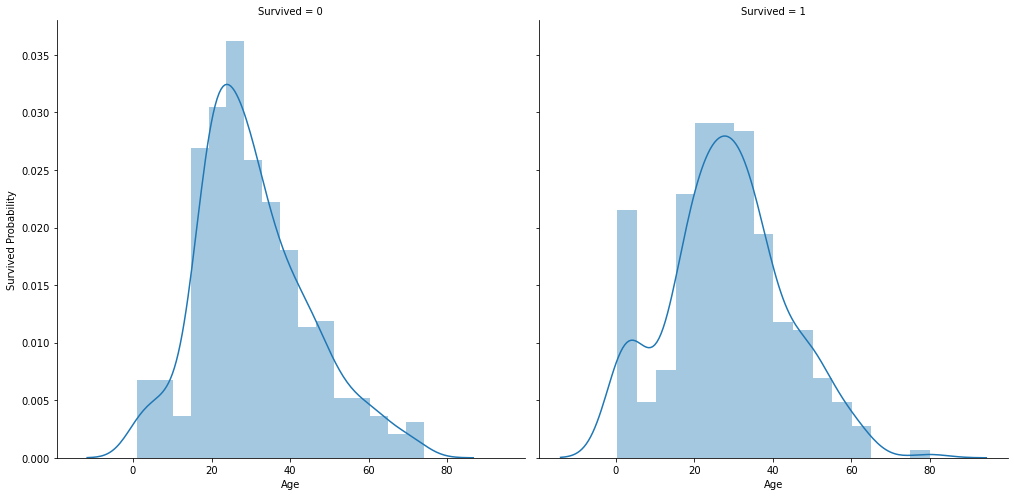

In [305]:
age_visual = sns.FacetGrid(data, col = 'Survived', size = 7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("Survived Probability")

### <font color = "green">Sex</font>

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

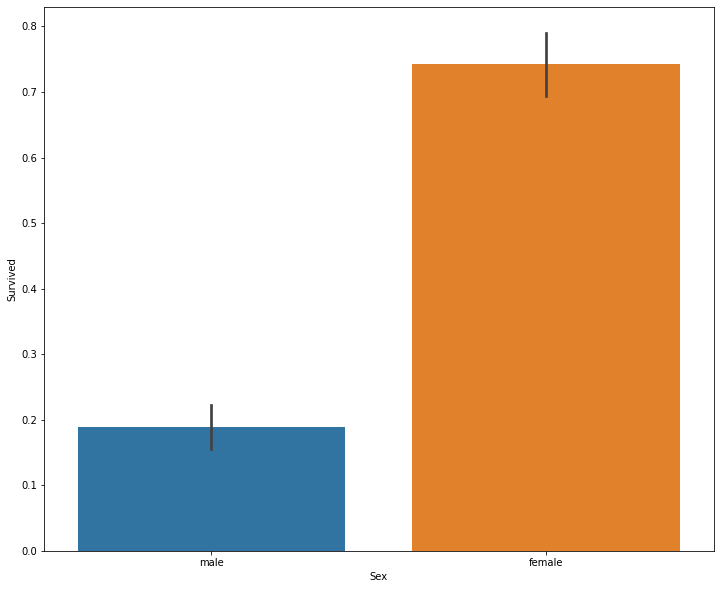

In [306]:
plt.figure(figsize = (12, 10))
sns.barplot(x = "Sex", y = "Survived", data = data)

In [307]:
data[['Sex', "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


### <font color = "green">PClasss</font>

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


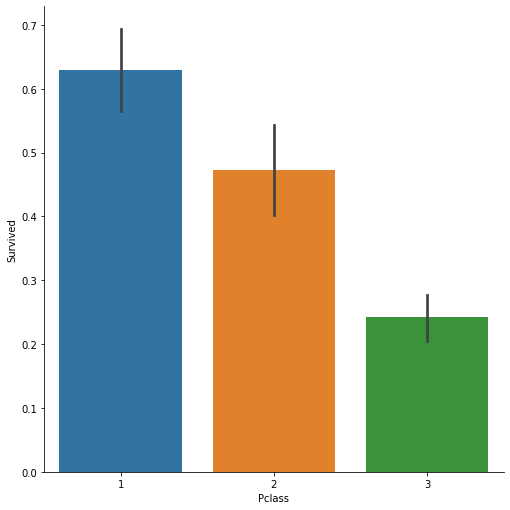

In [308]:
sns.factorplot(x ="Pclass", y ="Survived", data = data, kind = "bar", size = 7)

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


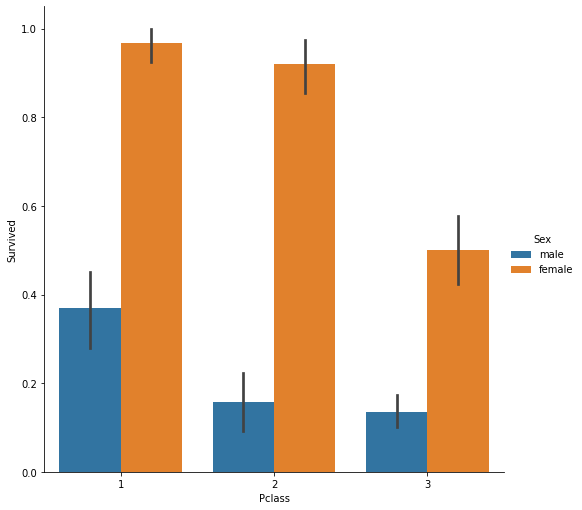

In [309]:
sns.factorplot(x ="Pclass", y ="Survived", data = data, kind = "bar", size = 7, hue = "Sex")

## <font color = "green">Embarkment</font>

In [310]:
data['Embarked'].isnull().sum()

2

In [311]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [312]:
data['Embarked'] = data['Embarked'].fillna("S")

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


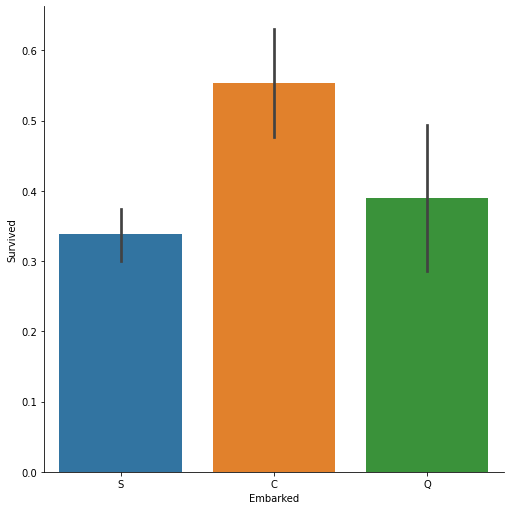

In [313]:
sns.factorplot(x ="Embarked", y ="Survived", data = data, kind = "bar", size = 7)

C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Prashant Patil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


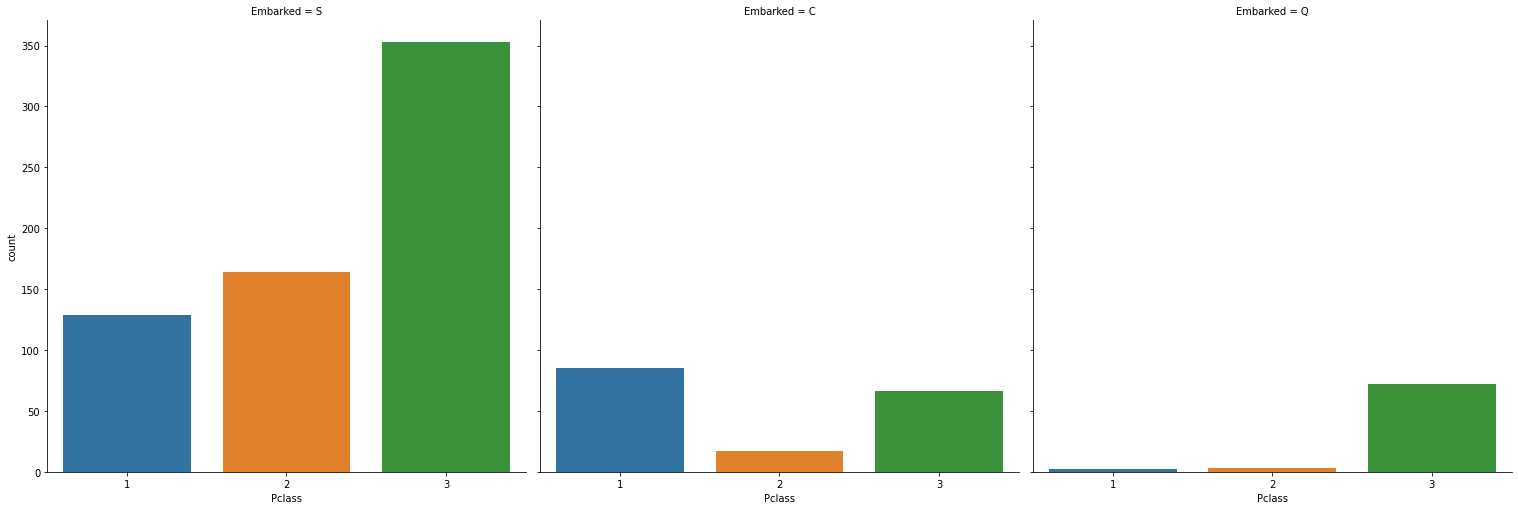

In [314]:
g = sns.factorplot("Pclass", col = "Embarked", data = data, size = 7, kind="count" )

## Preparing the data

In [315]:
test = pd.read_csv('test.csv')
test.info()
p = np.array(test['PassengerId'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [316]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data["Age"].isnull().sum()

rand_age = np.random.randint(mean-std, mean+std, size = is_null)

age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data['Age'] = age_slice 

In [317]:
is_null = test["Age"].isnull().sum()

rand_age = np.random.randint(mean-std, mean+std, size = is_null)

age_slice = test["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test['Age'] = age_slice 

In [318]:
mean = test['Fare'].mean()
std = test['Fare'].std()

is_null = test["Fare"].isnull().sum()

rand_Fare = np.random.randint(mean-std, mean+std, size = is_null)

Fare_slice = test["Fare"].copy()
Fare_slice[np.isnan(Fare_slice)] = rand_Fare
test['Fare'] = Fare_slice   

In [319]:
test['Age'].isnull().sum()

0

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
data['Embarked'] = data['Embarked'].fillna("S")

In [322]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop, axis = 1, inplace = True)

In [323]:
col_to_drop = ['Cabin', 'Ticket', 'Name']

test.drop(col_to_drop, axis = 1, inplace = True)


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [325]:
ports = {'S': 0, "C":1, "Q":2}
data['Embarked'] = data['Embarked'].map(ports)
test['Embarked'] = test['Embarked'].map(ports)


In [326]:
genders ={'male':0, "female":1}
data['Sex'] = data['Sex'].map(genders)
test['Sex'] = test['Sex'].map(genders)


### Splitting the data

In [327]:
xtrain = data.drop('Survived',axis=1)
ytrain = data['Survived']
xtest = test.drop('PassengerId',axis=1) 

In [328]:
xtest.isnull().sum() 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Feature Scaling

In [329]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

### Classification

In [330]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [331]:
logreg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [332]:
logreg.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [333]:
xtest

array([[ 0.82737724, -0.73769513,  0.37797081, ..., -0.47367361,
        -0.49078316,  2.57919938],
       [ 0.82737724,  1.35557354,  1.30371183, ..., -0.47367361,
        -0.50747884, -0.56883712],
       [-0.36936484, -0.73769513,  2.41460104, ..., -0.47367361,
        -0.45336687,  2.57919938],
       ...,
       [ 0.82737724, -0.73769513,  0.67420793, ..., -0.47367361,
        -0.50244517, -0.56883712],
       [ 0.82737724, -0.73769513,  0.26688189, ..., -0.47367361,
        -0.48633742, -0.56883712],
       [ 0.82737724, -0.73769513,  0.48905973, ...,  0.76762988,
        -0.19824428,  1.00518113]])

In [334]:
logreg_ypred = logreg.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest) 

In [ ]:
res = {
    "PassengerId":p,
    "Survived":rf_classifier_ypred
}
res = pd.DataFrame(res)
res.to_csv('res_random.csv',index=False)

In [ ]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2)) 

Logistic Regression :  81.34
Decision Tree       :  73.13
K-NN Classifier     :  78.36
Random Forest       :  79.1
